In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_excel('../customer_churn_large_dataset.xlsx')

In [5]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
df.drop(['CustomerID','Name'],axis=1,inplace=True)

In [7]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [8]:
X = df.iloc[:,:-1]

In [9]:
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266


In [10]:
y = df.iloc[:,[-1]]

In [11]:
y.head()

,Churn
0,0
1,0
2,0
3,1
4,0


In [18]:
numerical_cols = list(X.dtypes[X.dtypes!='O'].index)
categorical_cols = list(X.dtypes[X.dtypes=='O'].index)

In [19]:
numerical_cols

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

In [20]:
categorical_cols

['Gender', 'Location']

In [24]:
numerical_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder()),
        ('scaler',StandardScaler())
    ]
)

In [25]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_cols),
    ('categorical_pipeline',categorical_pipeline,categorical_cols)
])

In [60]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Age                             int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
dtype: object),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 Gender      object
Location    object
dtype: object)])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [27]:
X.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')

In [28]:
X_test.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')

In [29]:
X_train.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')

In [30]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [95]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'NaiveBayes':GaussianNB(),
    'KNN':KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance'),
    'RandomForest':RandomForestClassifier(),
    'XG Boost':GradientBoostingClassifier()
}

In [108]:
wcss=[]
for k in range(2,30):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init

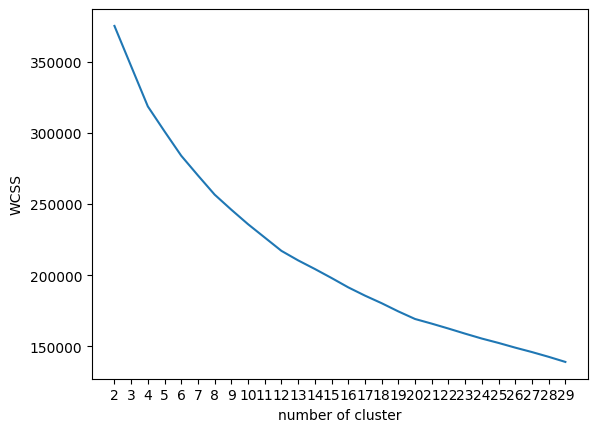

In [109]:
plt.plot(range(2,30),wcss)
plt.xticks(range(2,30))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [72]:
from sklearn.metrics import silhouette_score

In [110]:
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2,30):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init

In [116]:
silhouette_coefficients

[0.1737228095608418,
 0.13651187860628275,
 0.1446281312544194,
 0.1352485755183628,
 0.13408936639143287,
 0.13692180518170696,
 0.14346355454902657,
 0.14137143631671772,
 0.14418115925143363,
 0.14658331415168072,
 0.15229567802980298,
 0.15181518727752916,
 0.15264586375439942,
 0.1548525013687893,
 0.15634063389339234,
 0.16011257753242014,
 0.15966346193428868,
 0.1630363937855652,
 0.16750884791374493,
 0.16751605473546533,
 0.1675288588562239,
 0.16716666388136206,
 0.16719420285892758,
 0.17152451954005554,
 0.16895997571459223,
 0.1713344894260434,
 0.17563288977096425,
 0.17509933433127264]

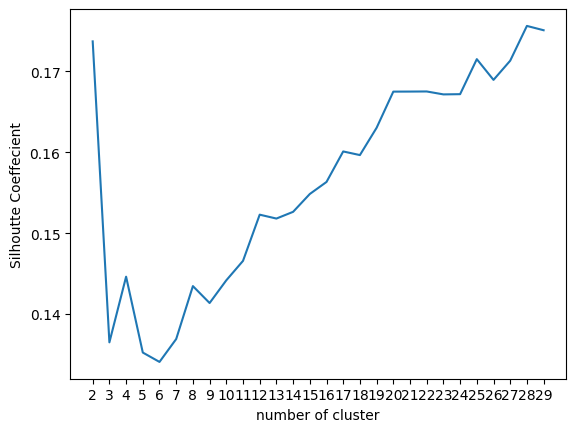

In [117]:
plt.plot(range(2,30),silhouette_coefficients)
plt.xticks(range(2,30))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [77]:
from kneed import KneeLocator

In [112]:
k=KneeLocator(range(2,30),wcss,curve='convex',direction='decreasing')

In [119]:
k.elbow

12

In [132]:
def evaluate_model(models,X_train,X_test,y_train,y_test):
    reports = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        confusion_met = confusion_matrix(y_test,y_pred)

        true_positive = confusion_met[0][0]
        false_positive = confusion_met[0][1]
        false_negative = confusion_met[1][0]
        true_negative = confusion_met[1][1]

        accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)



        reports[list(models.keys())[i]] = accuracy
        
    print(reports)

    best_model_score = max(list(reports.values()))

    best_model_name = list(reports.keys())[list(reports.values()).index(best_model_score)]

    return (f'Best Model Name:{best_model_name},Best Model Score : {best_model_score}')

In [133]:
a = evaluate_model(models,X_train,X_test,y_train,y_test)

c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Devenedra Goswami\Customer Churn Prediction\Customer_Churn_Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Devenedra Gos

{'LogisticRegression': 0.50024, 'DecisionTree': 0.49708, 'SVM': 0.50212, 'NaiveBayes': 0.50192, 'KNN': 0.50344, 'RandomForest': 0.497, 'XG Boost': 0.49916}
